# Istanbul AirBnb EDA

### Name Surname - Student ID

Bu projenin amacı İstanbul'da yatırım amaçlı bir gayrimenkul edinmek isteyen biri gözünden İstanbul'daki AirBnb'lere ait verileri incelemektir. Bu kapsamda aşağıdaki sorulara cevap aranacaktır:

<ol>
  <li>En çok hangi semtte AirBnb bulunmaktadır?</li>
  <li>En çok hangi tür AirBnb'ler bulunmaktadır?</li>
    <li>Semtlere göre AirBnB tür dağılımı nasıldır?</li>
    <li>Gecelik ortalama fiyatlar semtlere göre nasıl değişiklik göstermektedir?</li>
    <li>Türlerine göre AirBnb'lerin ortalama gecelik getirisi nasıl değişmektedir?</li>
     <li>AirBnb türlerine göre gecelik fiyatlar semtlere göre nasıl değişmektedir?</li>
     <li>AirBnb türlerine göre minimum gece sayısı nasıl değişmektedir?</li>
    <li>Birden fazla Airbnb ilanına sahip hostlar var mı?</li>
    <li>İlanlarda en çok hangi kelimeler kullanılıyor?</li>
</ol>

Problemin ve araştırma sorularının belirlenmesinde sınıfta incelenen NYC Airbnb veri seti üzerinde yapılan analizler ve konuşmalardan esinlenilmiştir.

## 1. Veri Seti

İlk olarak Kaggle sitesindeki NYC Airbnb verinin metadası incelenerek veri setinin ana kaynağı olan "Inside Airbnb" sayfasına ulaşılmıştır. 

Inside Airbnb, Airbnb'nin konut toplulukları üzerindeki etkisi hakkında veri ve savunuculuk sağlayan misyon odaklı bir projedir. Inside Airbnb'nin amacı paydaşlarının konut kiralamanın rolünü anlamaları, doğru ve etkili karar vermeleri üzerine bir vizyonla veri sağlamayı hedeflemektedir. Inside Airbnb sitesinin sunduğu veriler, Airbnb sitesindeki halka açık bilgilerden elde edilir. Veriler, Inside Airbnb tarafından temizlenir, düzenlenir ve kullanıma hazır hale getirilir.  

Türkiye'den sadece İstanbul'a ait veriler sunulduğu için Ankara yerine İstanbul'a ait veriler ile ilerlenmiştir. 

İstanbul AirBnb veri seti; ev sahipleri, coğrafi müsaitlik durumu, mahalle ve yorumlar hakkında daha fazla bilgi edinmek için bilgiler içerir. Veri seti 26 Eylül 2022'de güncellenmiştir.

Kaynak: http://insideairbnb.com/istanbul

##  2. Verilerin Temizlenmesi

In [1]:
##gerekli kütüphanelerin import edilmesi
import pandas as pd #veri manipülasyonu için
import numpy as np #veri manipülasyonu için
import seaborn as sns #görselleştirme için
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#veri setinin yüklenmesi
airbnb = pd.read_csv("listings.csv")

In [3]:
#veri setinin ilk 5 satırının yazdırılması
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27266,Cozy flat on Anatolian side of İst1,90354,Lutfiye,NaN,Kadikoy,40.985690,29.045730,Entire home/apt,1318,1,0,NaN,NaN,1,90,0,NaN
1,73477,Cozy Flat in center of Istanbul,383789,Berat,NaN,Beyoglu,41.034447,28.987555,Entire home/apt,1196,7,4,2022-08-27,0.54,1,299,4,NaN
2,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.032540,28.981530,Entire home/apt,892,15,3,2022-01-09,0.03,1,188,1,NaN
3,124137,Beautiful Artist's home staycation,594053,Devrim,NaN,Beyoglu,41.034510,28.986540,Entire home/apt,1695,1,82,2022-09-20,0.73,1,281,19,NaN
4,28277,Duplex Apartment 11 with Terrace,121607,Alen Ziya,NaN,Sisli,41.046720,28.984020,Entire home/apt,1588,10,6,2022-07-27,0.36,19,338,5,NaN


In [4]:
#veri setinin son 5 satırının yazdırılması
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
33254,35073875,Cute Concept House of Burgaz,56580878,Reyhan,NaN,Adalar,40.88389,29.06934,Entire home/apt,2210,1,10,2020-10-12,0.25,2,364,0,NaN
33255,544189343876574441,Breathtaking Bosphorus View With Large Terrace,164058076,Ali,NaN,Sariyer,41.09068,29.05725,Entire home/apt,2600,2,27,2022-09-16,3.46,6,211,27,NaN
33256,677588431709009582,Maltepe sahilde deniz manzaralı karavan keyfi,164487971,İlhan,NaN,Maltepe,40.92897,29.11753,Entire home/apt,500,1,0,NaN,NaN,1,365,0,NaN
33257,3885996,Apart Room * 1 minute walk to metro & ferry stop,20099004,Duran,NaN,Fatih,41.02127,28.96321,Entire home/apt,1160,1,2,2022-09-17,0.62,6,350,2,NaN
33258,603674845653461814,Flat with Great View,454006998,Enver,NaN,Sariyer,41.16468,29.05533,Entire home/apt,7429,5,0,NaN,NaN,1,329,0,NaN


### 2.1 Nan Değerlerin Temizlenmesi ve Tamamlanması

Veri setine ilk bakışta çok fazla NaN olduğu, neighbourhood_group ve license sütunlarının tamamen NaNdan oluştuğu görülmektedir. Veri setiyle ilgili daha detaylı bilgi almak için:  

In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33259 non-null  int64  
 1   name                            33239 non-null  object 
 2   host_id                         33259 non-null  int64  
 3   host_name                       33259 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   33259 non-null  object 
 6   latitude                        33259 non-null  float64
 7   longitude                       33259 non-null  float64
 8   room_type                       33259 non-null  object 
 9   price                           33259 non-null  int64  
 10  minimum_nights                  33259 non-null  int64  
 11  number_of_reviews               33259 non-null  int64  
 12  last_review                     

airbnb.info() komutunun çıktısına baktığımız zaman non-null count sayılarının birbirinden farklı olduğunu görmekteyiz. Boş olan verilerin belirlenmesi ve temizlenmesi için: 

In [6]:
airbnb.isnull().sum()

id                                    0
name                                 20
host_id                               0
host_name                             0
neighbourhood_group               33259
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       13875
reviews_per_month                 13875
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           33259
dtype: int64

neighbourhood_group ve license sütunlarının tamamen NaNdan oluştuğu gözlemimiz bu komutun çıktılarıyla doğrulanmıştır. Bu verilerin doldurulması mümkün olmadığından veri setinden çıkarılması gerekmektedir.

In [7]:
airbnb.drop(['neighbourhood_group','license'], axis=1, inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33259 non-null  int64  
 1   name                            33239 non-null  object 
 2   host_id                         33259 non-null  int64  
 3   host_name                       33259 non-null  object 
 4   neighbourhood                   33259 non-null  object 
 5   latitude                        33259 non-null  float64
 6   longitude                       33259 non-null  float64
 7   room_type                       33259 non-null  object 
 8   price                           33259 non-null  int64  
 9   minimum_nights                  33259 non-null  int64  
 10  number_of_reviews               33259 non-null  int64  
 11  last_review                     19384 non-null  object 
 12  reviews_per_month               

airbnb.info() komutunun çıktısından aynı zamanda last_review sütunun veri türünün object olduğu görülmektedir. Veri setine bakıldığında bu verilerin aslında yıl-ay-gün formatında tarih verileri olduğu görülmektedir. Bu verilerin türlerinin düzeltilmesi gerekmektedir:

In [8]:
airbnb["last_review"] = pd.to_datetime(airbnb.last_review)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              33259 non-null  int64         
 1   name                            33239 non-null  object        
 2   host_id                         33259 non-null  int64         
 3   host_name                       33259 non-null  object        
 4   neighbourhood                   33259 non-null  object        
 5   latitude                        33259 non-null  float64       
 6   longitude                       33259 non-null  float64       
 7   room_type                       33259 non-null  object        
 8   price                           33259 non-null  int64         
 9   minimum_nights                  33259 non-null  int64         
 10  number_of_reviews               33259 non-null  int64         
 11  la

Verilerin türleri düzelmekle beraber name, last_review ve reviews_per_month verilerinde eksiklikler olduğu göze çarpmaktadır. 

<ol>
  <li>Name alanı cevap aranan sorularla alakalı olmadığı için boş bırakılabilir.</li>
  <li>"last_review" tarih değerleridir; listeleme için herhangi bir değerlendirme yoksa tarih değeri mevcut olmayacaktır. Bizim sorularımız için bu sütun önemsizdir, bu nedenle bu değerlerin eklenmesine gerek yoktur.</li>
   <li>"review_per_month" sütununa eksik değerler için basitçe 0.0 ekleyebiliriz; toplam 0 inceleme ile bu mantığı takip ederek ayda 0,0 inceleme oranı olacaktır.</li>
</ol>

In [9]:
airbnb.reviews_per_month.isnull().sum()

13875

In [10]:
airbnb.fillna({'reviews_per_month':0}, inplace=True) 
#"reviews_per_month" içindeki tüm NaN değerlerinin 0 ile değiştirilmesi

In [11]:
airbnb.isnull().sum()

id                                    0
name                                 20
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       13875
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

Son olarak birden fazla kez listelenen ilanların da temizlenmesi için:

In [12]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [13]:
airbnb.info()  
#veri setinin son haline bakıldığında boş verilerin temizlediği ve 
#birden fazla kez girilmiş ilan olmadığı görülmektedir.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33259 entries, 0 to 33258
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              33259 non-null  int64         
 1   name                            33239 non-null  object        
 2   host_id                         33259 non-null  int64         
 3   host_name                       33259 non-null  object        
 4   neighbourhood                   33259 non-null  object        
 5   latitude                        33259 non-null  float64       
 6   longitude                       33259 non-null  float64       
 7   room_type                       33259 non-null  object        
 8   price                           33259 non-null  int64         
 9   minimum_nights                  33259 non-null  int64         
 10  number_of_reviews               33259 non-null  int64         
 11  la

In [14]:
#NaN veriler önceki komutlarla temizlendiği için NaN değerlerini veri kümesinden kaldırmaya yarayan bu kod bloğu kapatılmıştır.
#airbnb.isnull().sum()
#airbnb.dropna(how='any',inplace=True)


### 2.2 Temel İstatistik Bilgilerin İncelenmesi 

In [15]:
airbnb.describe().round()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.325900e+04,33259.0,33259.0,33259.0,33259.0,33259.0,33259.0,33259.0,33259.0,33259.0,33259.0
mean,2.936084e+17,256271749.0,41.0,29.0,1826.0,17.0,10.0,1.0,10.0,283.0,5.0
std,3.259099e+17,167483012.0,0.0,0.0,14935.0,99.0,27.0,1.0,27.0,116.0,10.0
min,2.726600e+04,19692.0,41.0,28.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,4.116637e+07,77726554.0,41.0,29.0,576.0,1.0,0.0,0.0,1.0,194.0,0.0
50%,5.338896e+07,275475569.0,41.0,29.0,992.0,2.0,1.0,0.0,2.0,351.0,1.0
75%,6.512361e+17,421576906.0,41.0,29.0,1606.0,3.0,7.0,1.0,7.0,365.0,5.0
max,7.234430e+17,480891844.0,41.0,30.0,1841450.0,1000.0,896.0,18.0,205.0,365.0,293.0


airbnb.describe() komutuna baktığımızda gecelik minimum fiyatı 0 olan ilanlar olduğu görülmektedir. AirBnB ücretsiz konaklama imkanı sunmamaktadır yani price=0 olan verilerin hatalı olduğu söylenebilir. 

Ayrıca son 365 gün içindeki uygunluğu 0 olan konaklama seçenekleri olduğu da görülmektedir. Insider AirBnB sitesinde bu durumun aktif olmayan ya da uzun süreli tutulmuş konaklamaları temsil ettiği belirtilmektedir. 

price=0 ve availability_365=0 olan veriler analizi olumsuz etkileyeceğinden temizlenmelidir:

In [16]:
#price = 0 vey availability_365 = 0 olan satırların silinmesi 
indexNames = airbnb[ (airbnb['price'] == 0) | (airbnb['availability_365'] == 0) ].index
airbnb.drop(indexNames , inplace=True)

In [17]:
airbnb.describe().round()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.222000e+04,32220.0,32220.0,32220.0,32220.0,32220.0,32220.0,32220.0,32220.0,32220.0,32220.0
mean,2.993733e+17,257346341.0,41.0,29.0,1841.0,17.0,10.0,1.0,10.0,292.0,5.0
std,3.266383e+17,167921678.0,0.0,0.0,15165.0,98.0,28.0,1.0,27.0,106.0,10.0
min,2.726600e+04,19692.0,41.0,28.0,57.0,1.0,0.0,0.0,1.0,1.0,0.0
25%,4.135968e+07,77952689.0,41.0,29.0,590.0,1.0,0.0,0.0,1.0,246.0,0.0
50%,5.359921e+07,277051470.0,41.0,29.0,1000.0,2.0,1.0,0.0,2.0,353.0,1.0
75%,6.533936e+17,422682978.0,41.0,29.0,1620.0,3.0,7.0,1.0,7.0,365.0,5.0
max,7.234430e+17,480891844.0,41.0,30.0,1841450.0,1000.0,896.0,18.0,205.0,365.0,293.0


<Figure size 2160x2160 with 0 Axes>

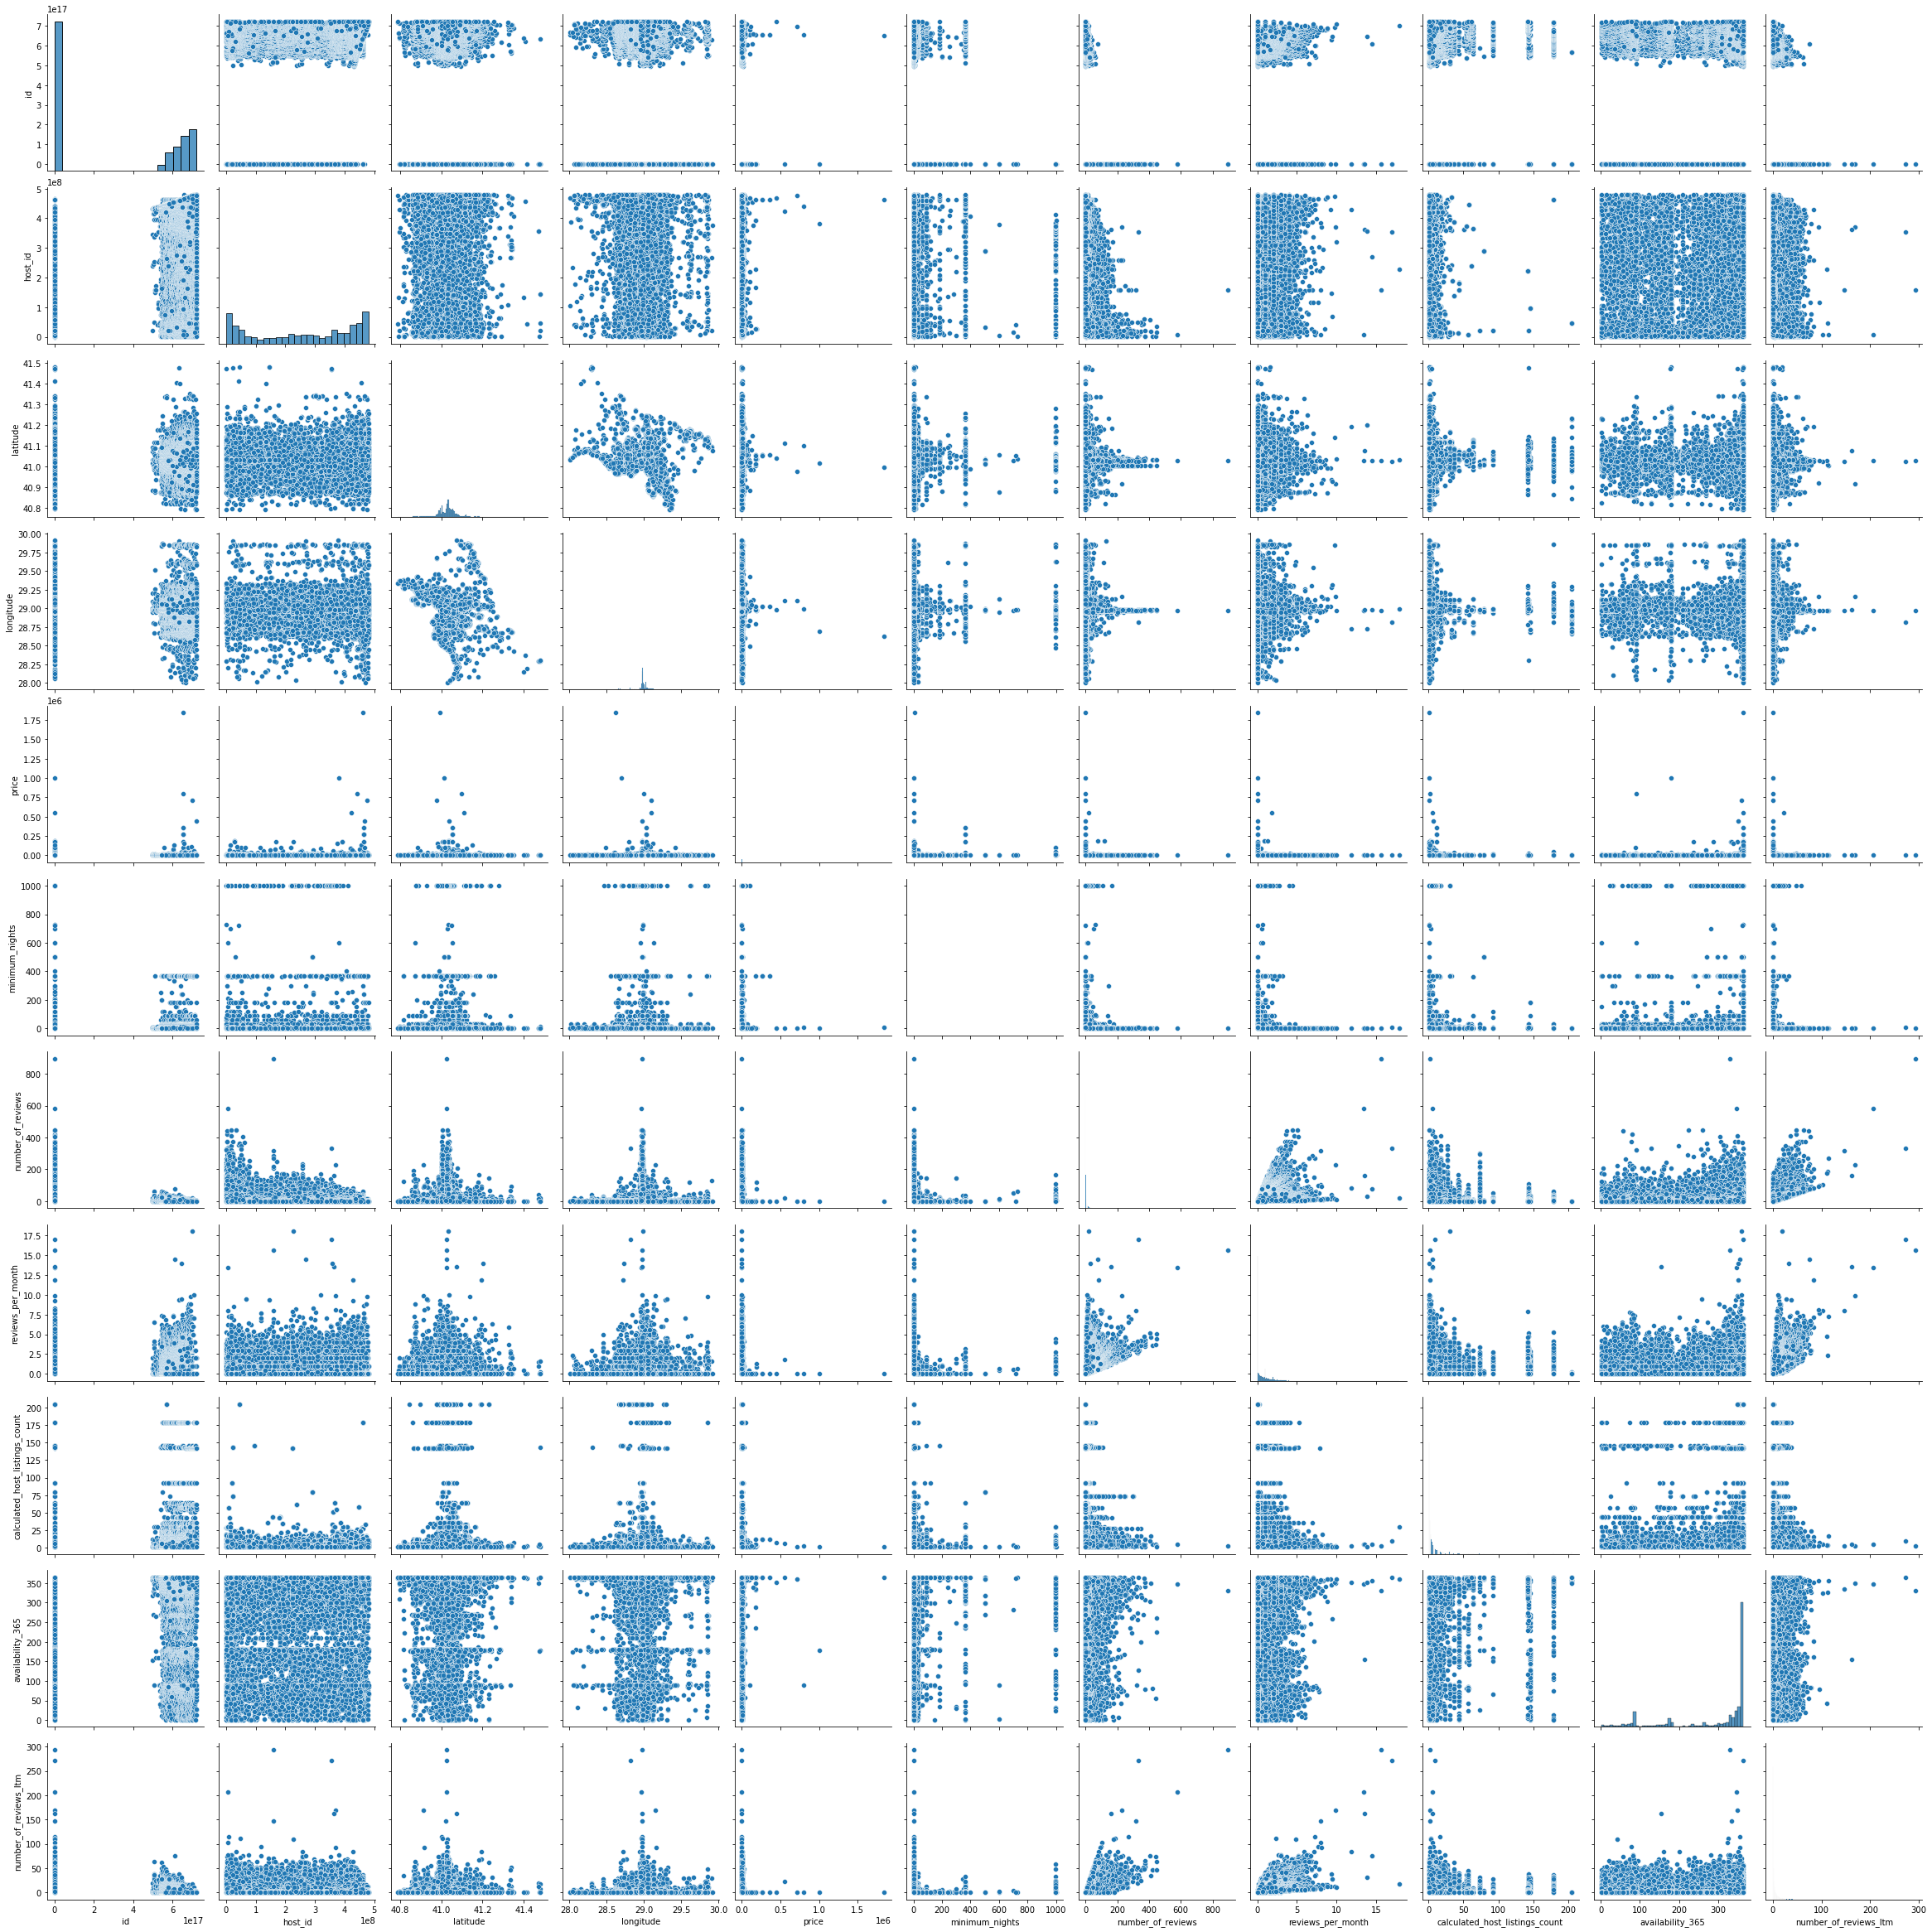

In [18]:
plt.figure(figsize=(30, 30))
sns.pairplot(airbnb, height=3, diag_kind="hist")

Text(0.5, 1.0, 'Correlation Matrix')

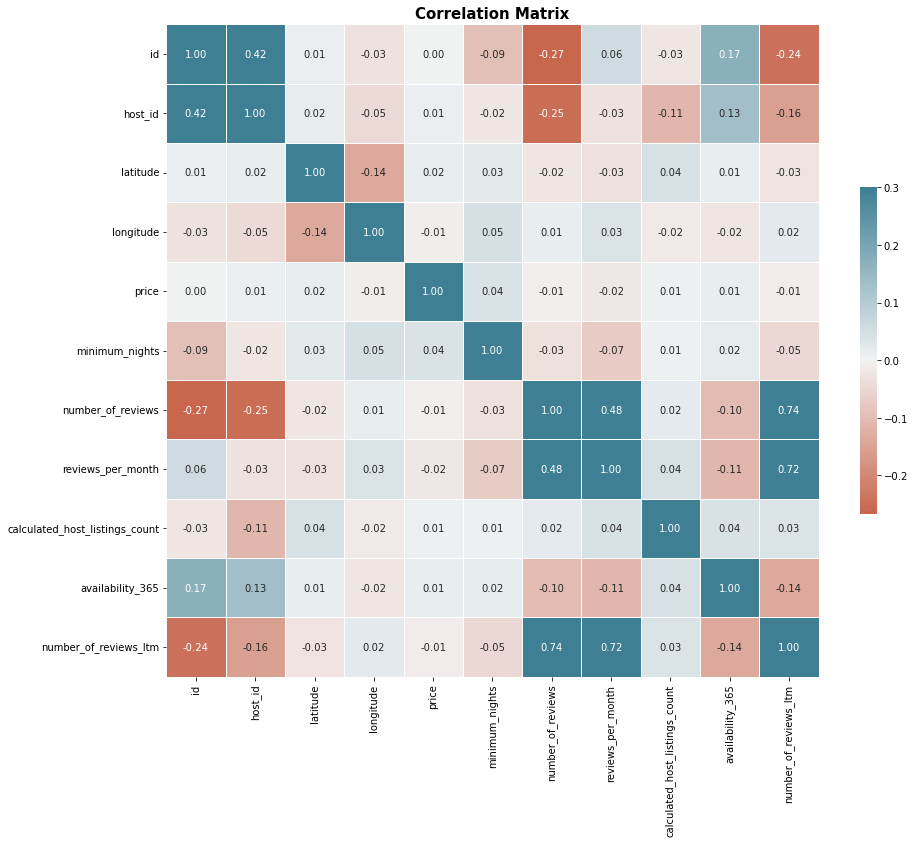

In [19]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=airbnb.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

## 3. Verilerin Analiz Edilmesi

### 3.1 En çok hangi semtte AirBnb bulunmaktadır?

Semtlere göre konaklamaların dağılımının yapılabilmesi için ilk olarak hangi semtlerde AirBnB evleri olduğuna bakılması gerekmektedir.

In [22]:
len(airbnb.neighbourhood.unique())

39

In [23]:
airbnb['neighbourhood'].unique()

array(['Kadikoy', 'Beyoglu', 'Sisli', 'Sariyer', 'Besiktas', 'Uskudar',
       'Kagithane', 'Fatih', 'Esenyurt', 'Basaksehir', 'Maltepe',
       'Bahcelievler', 'Beylikduzu', 'Atasehir', 'Pendik', 'Beykoz',
       'Kartal', 'Cekmekoy', 'Sancaktepe', 'Tuzla', 'Bagcilar', 'Adalar',
       'Gaziosmanpasa', 'Zeytinburnu', 'Bakirkoy', 'Gungoren', 'Umraniye',
       'Eyup', 'Avcilar', 'Sile', 'Kucukcekmece', 'Buyukcekmece',
       'Bayrampasa', 'Catalca', 'Esenler', 'Silivri', 'Sultangazi',
       'Arnavutkoy', 'Sultanbeyli'], dtype=object)

Buna göre İstanbul'un tüm semtlerinde AirBnb bulunmaktadır. 

Semt sayısı bilgisi Wikipedi'den edinilmiştir: https://tr.wikipedia.org/wiki/%C4%B0stanbul%27un_il%C3%A7eleri#:~:text=Son%20olarak%202008%20y%C4%B1l%C4%B1nda%20Arnavutk%C3%B6y,39%20il%C3%A7e%2C%20963%20mahalle%20bulunmaktad%C4%B1r.

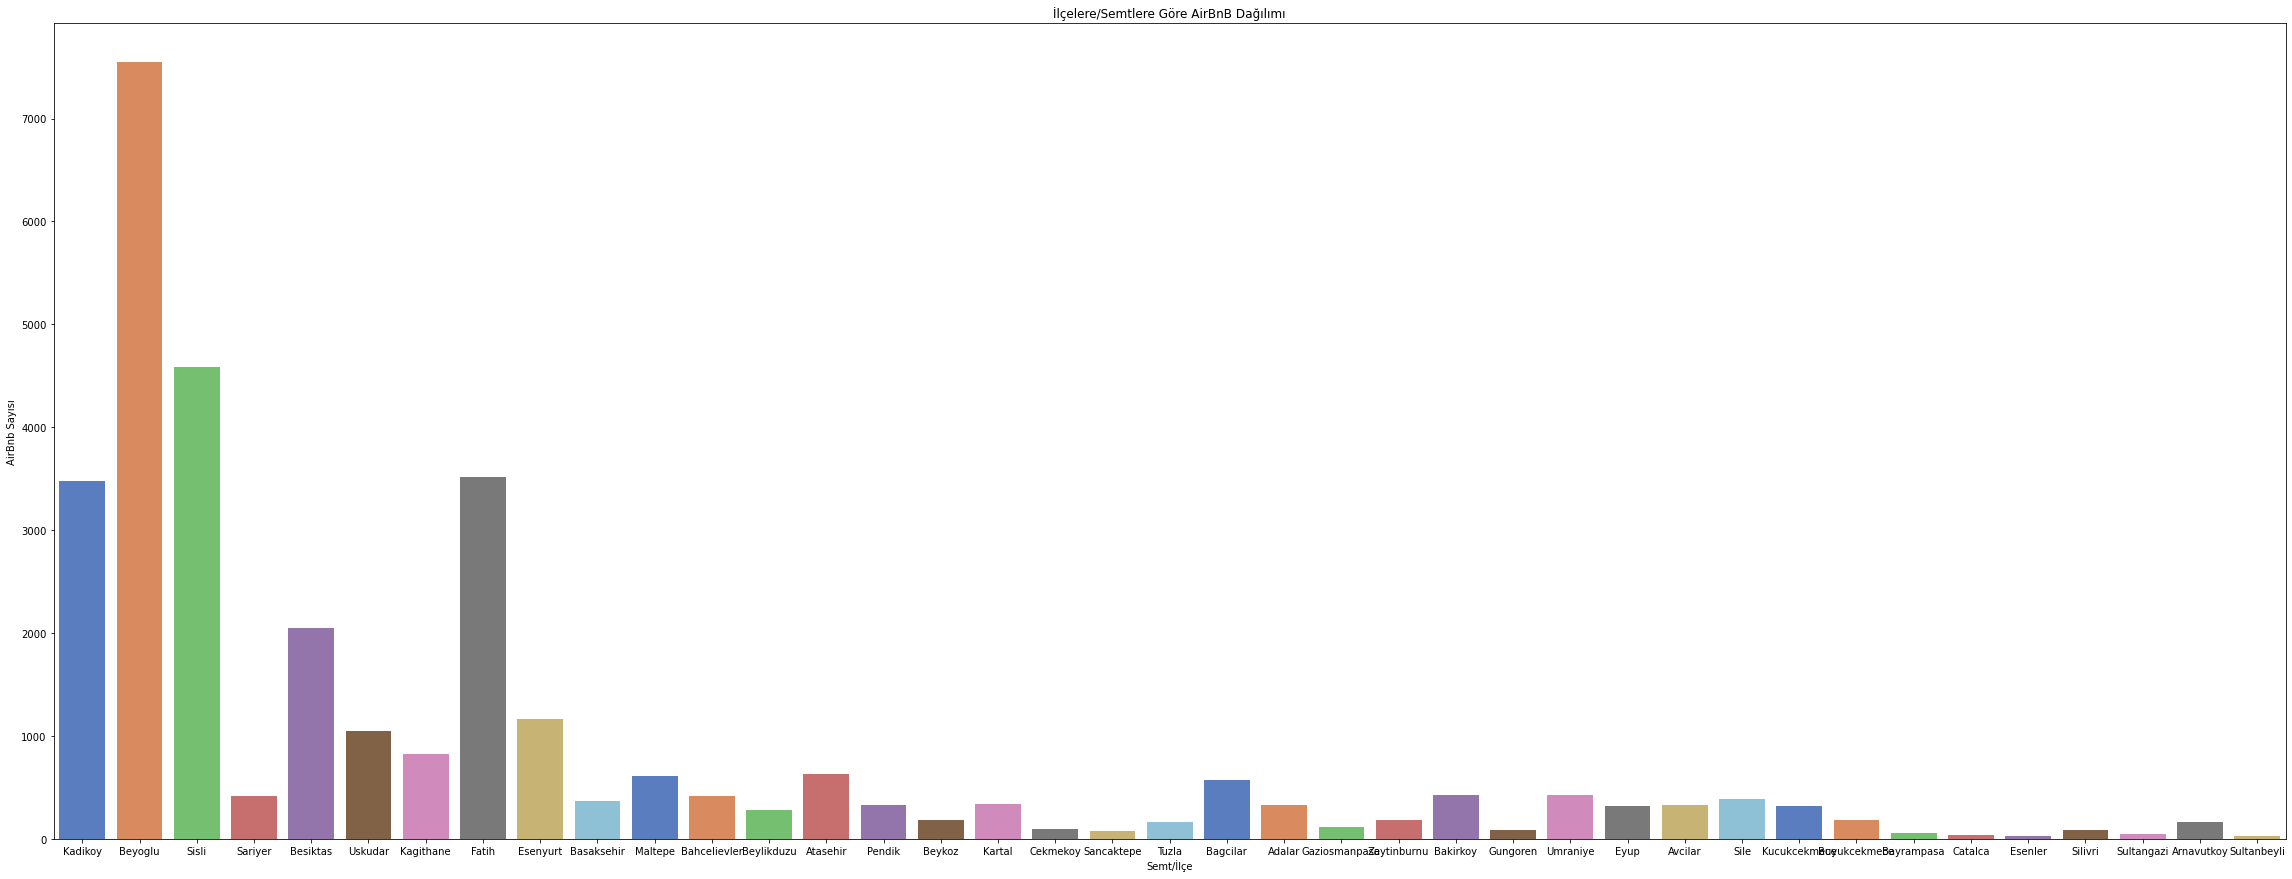

In [24]:
f,ax = plt.subplots(figsize=(40,15))
ax = sns.countplot(airbnb.neighbourhood,palette="muted")
plt.title('İlçelere/Semtlere Göre AirBnB Dağılımı')
plt.xlabel('Semt/İlçe')
plt.ylabel('AirBnb Sayısı')
#plt.show()
plt.savefig('Semtlere_Gore_AirBnB_Dagilimi.png')

Bu dağılıma göre sırasıyla en çok Beyoğlu, Şişli, Fatih, Kadıköy ve Beşiktaş'ta AirBnB olduğu görülmektedir. Bu gözlemin doğrulaması için:

In [25]:
airbnb.neighbourhood.value_counts().head(5)
#airbnb.groupby('neighbourhood')['room_type'].count()

Beyoglu     7546
Sisli       4589
Fatih       3520
Kadikoy     3474
Besiktas    2052
Name: neighbourhood, dtype: int64

### 3.2 En çok hangi tür AirBnb'ler bulunmaktadır?

İlk olarak AirBnb türlerine bakılması gerekmektedir:

In [26]:
airbnb['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [27]:
airbnb.room_type.value_counts()

Entire home/apt    20318
Private room       10903
Shared room          552
Hotel room           447
Name: room_type, dtype: int64

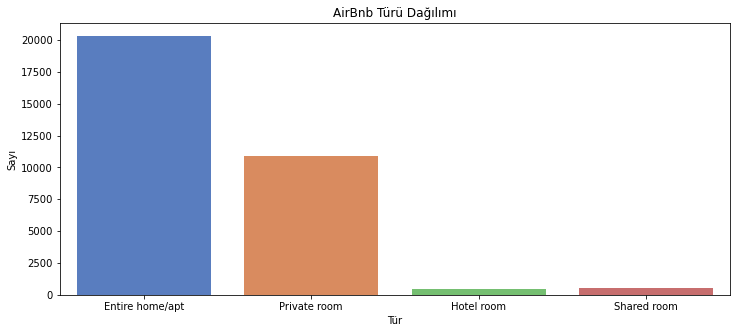

In [28]:
f,ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(airbnb.room_type,palette="muted")
plt.title('AirBnb Türü Dağılımı')
plt.xlabel('Tür')
plt.ylabel('Sayı')
#plt.show()
plt.savefig('AirBnb_Turu_Dagilimi.png')

Tüm ev seçeneğinin diğer AirBnb türlerinin toplamının neredeyse 2 katı olduğunu görebiliriz.

### 3.3 Semtlere göre AirBnB tür dağılımı nasıldır?

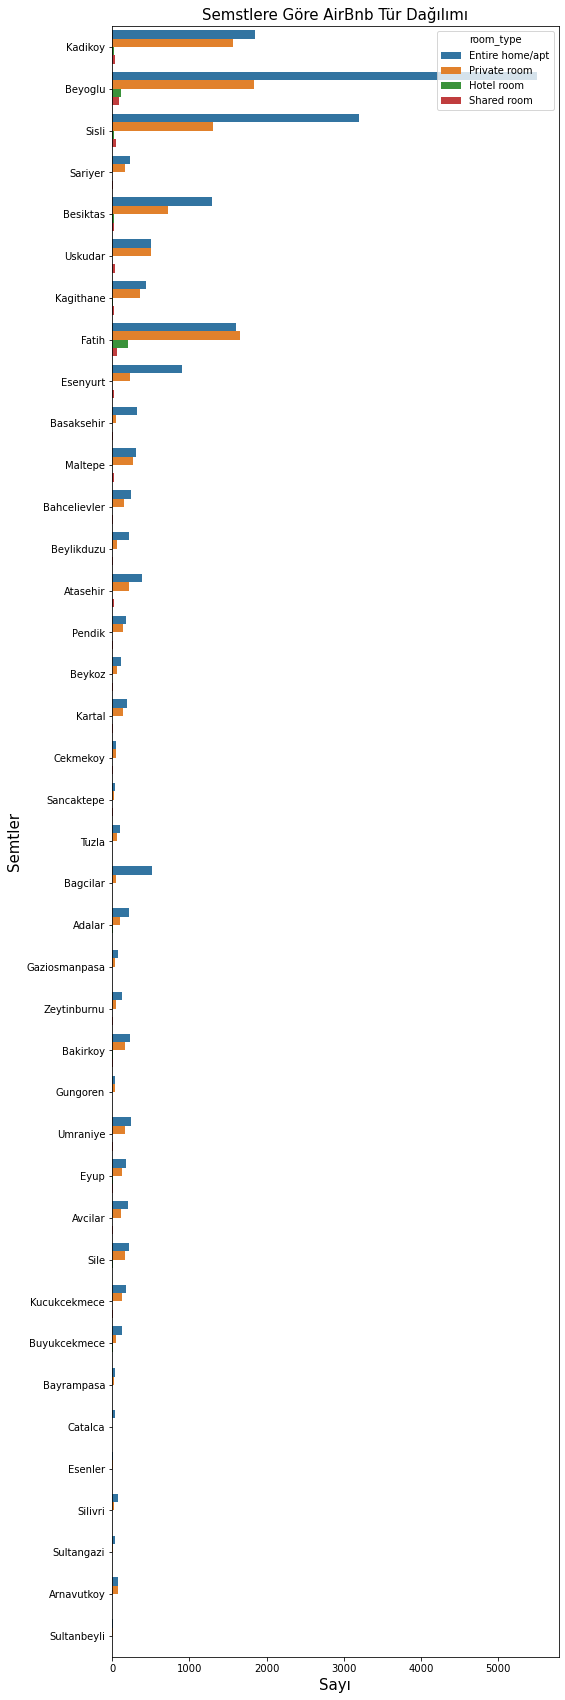

In [29]:
fig, ax = plt.subplots(figsize=(8, 30))
sns.countplot(data=airbnb, y='neighbourhood', hue='room_type', ax=ax)
plt.title('Semstlere Göre AirBnb Tür Dağılımı', size=15)
plt.xlabel('Sayı', size=15)
plt.ylabel('Semtler', size=15)
plt.show()

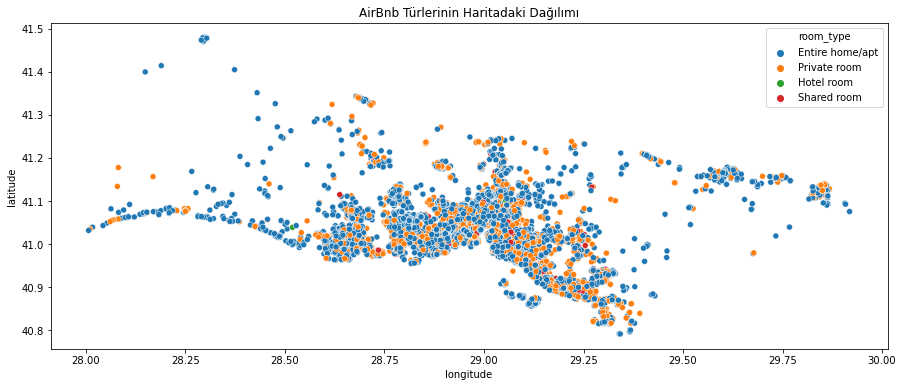

In [30]:
fig = plt.figure(figsize=(15,6))
sns.scatterplot(airbnb['longitude'], airbnb['latitude'], hue=airbnb['room_type'])
plt.title('AirBnb Türlerinin Haritadaki Dağılımı')
#plt.show()
plt.savefig('AirBnb_Turlerinin_Haritadaki_Dagilimi.png')

### 3.4 Gecelik ortalama fiyatlar semtlere göre nasıl değişiklik göstermektedir?

In [31]:
airbnb.groupby(['neighbourhood'])['price'].mean().to_frame().sort_values(by='price').round()
#semtegore = airbnb.groupby("neighbourhood")['price'].agg(['min', 'max', 'mean', 'count']).reset_index()
#semtegore.sort_values(by="mean", ascending=False)

,price
neighbourhood,
Sultanbeyli,519.0
Esenler,778.0
Sancaktepe,824.0
Maltepe,883.0
Gungoren,911.0
Esenyurt,925.0
Kadikoy,959.0
Sultangazi,1060.0
Umraniye,1141.0


#####  Not: Gecelik fiyatlar birbirine çok yakın olduğundan renk farkları net olarak görülememektedir

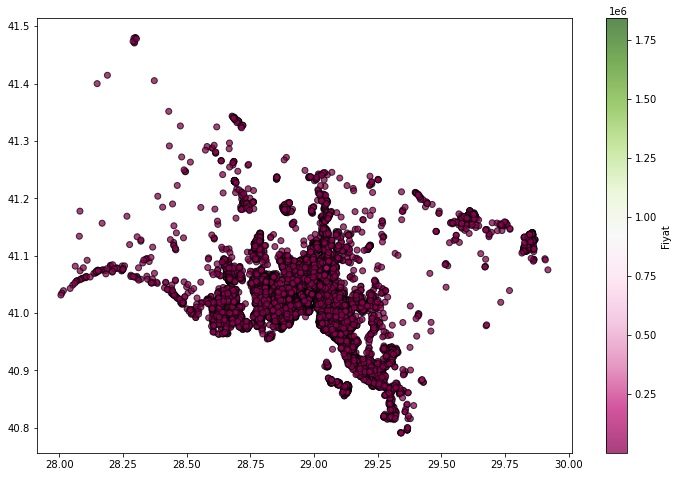

In [32]:
plt.figure(figsize=(12, 8))
plt.scatter(airbnb.longitude, airbnb.latitude, c=airbnb.price, cmap='PiYG', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Fiyat')

### 3.5 Türlerine göre AirBnb'lerin ortalama gecelik getirisi nasıl değişmektedir?

In [33]:
airbnb['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

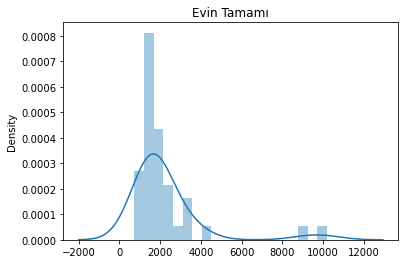

In [34]:
df1 = airbnb[airbnb.room_type == "Entire home/apt"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
plt.title('Evin Tamamı')
sns.distplot(d)
plt.show()

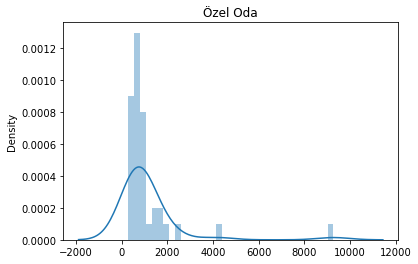

In [35]:
df2 = airbnb[airbnb.room_type == "Private room"][["neighbourhood","price"]]
d = df2.groupby("neighbourhood").mean()
plt.title('Özel Oda')
sns.distplot(d)
plt.show()

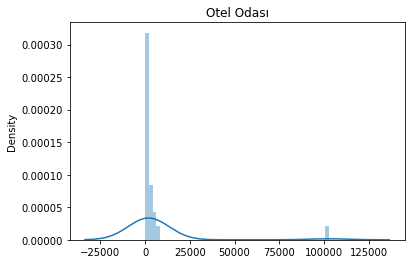

In [36]:
df3 = airbnb[airbnb.room_type == "Hotel room"][["neighbourhood","price"]]
d = df3.groupby("neighbourhood").mean()
plt.title('Otel Odası')
sns.distplot(d)
plt.show()

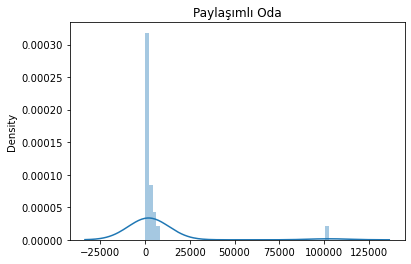

In [37]:
df4 = airbnb[airbnb.room_type == "Shared room"][["neighbourhood","price"]]
d = df3.groupby("neighbourhood").mean()
plt.title('Paylaşımlı Oda')
sns.distplot(d)
plt.show()

<Figure size 1296x1296 with 0 Axes>

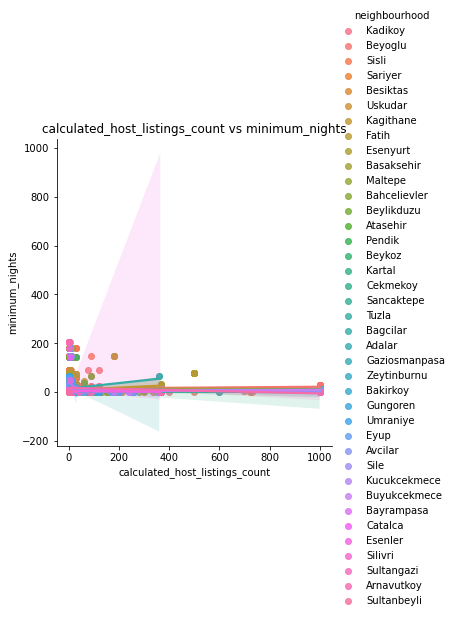

In [38]:
plt.figure(figsize=(18,18))
sns.lmplot(x='minimum_nights',y='calculated_host_listings_count',hue="neighbourhood",data=airbnb)
plt.xlabel('calculated_host_listings_count')
plt.ylabel('minimum_nights')
plt.title('calculated_host_listings_count vs minimum_nights')
plt.show()

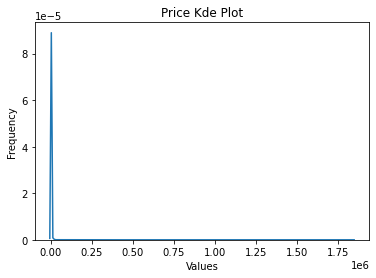

In [39]:
sns.kdeplot(airbnb['price'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Kde Plot')
plt.show()

### 3.6 AirBnb türlerine göre gecelik fiyatlar semtlere göre nasıl değişmektedir?

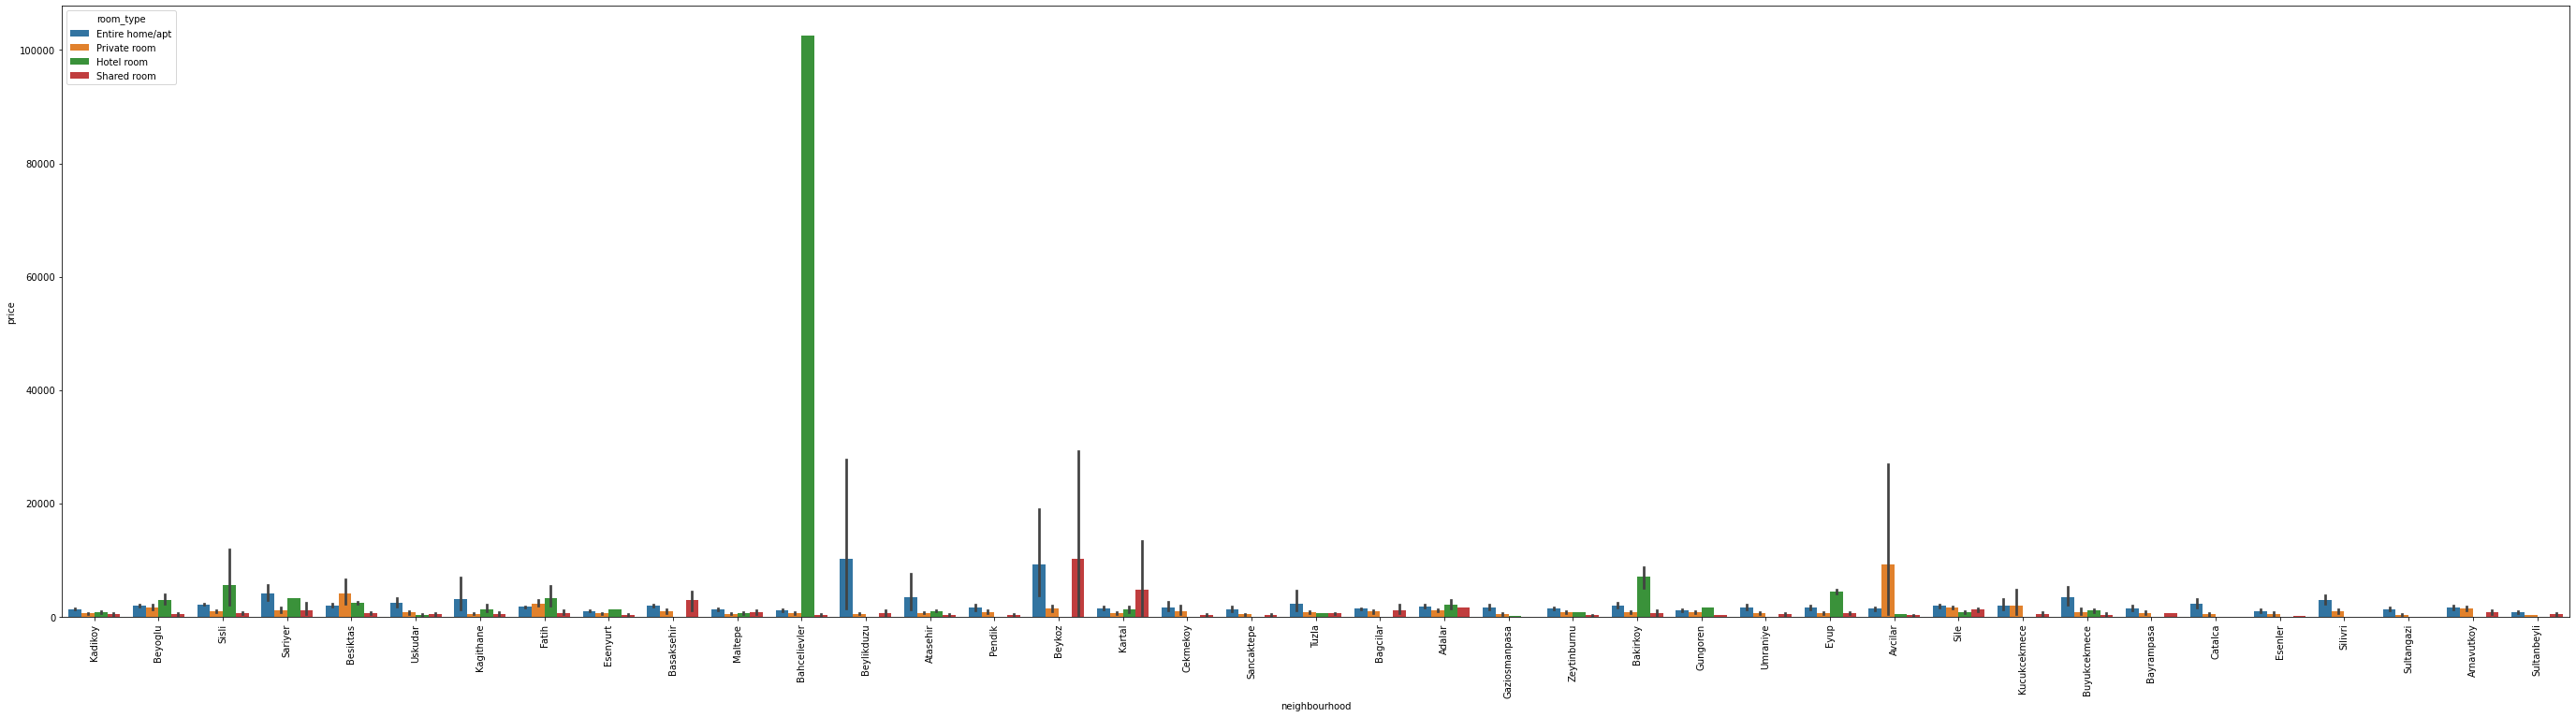

In [40]:
plt.figure(figsize=(48,12))
sns.barplot(x = "neighbourhood", y = "price", hue = "room_type", data = airbnb)
plt.xticks(rotation=90)
#plt.show()
plt.savefig('AirBnb_Turune_Gore_Semt_Fiyat_Dagilim.png')

### 3.7 AirBnb türlerine göre konaklanan minimum gece sayısı nasıl değişmektedir?

(-1.0, 570.0)

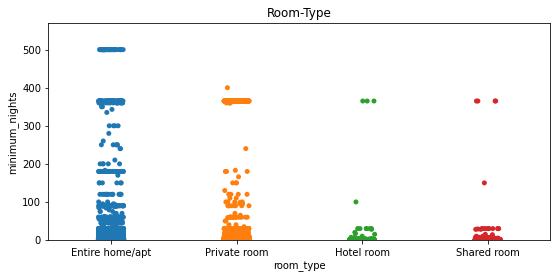

In [41]:
fig,ax=plt.subplots(1,1,figsize=(9,4))
sns.stripplot(y="minimum_nights",data=airbnb,x="room_type");
ax.set_title("Room-Type");
plt.ylim([-1,570])

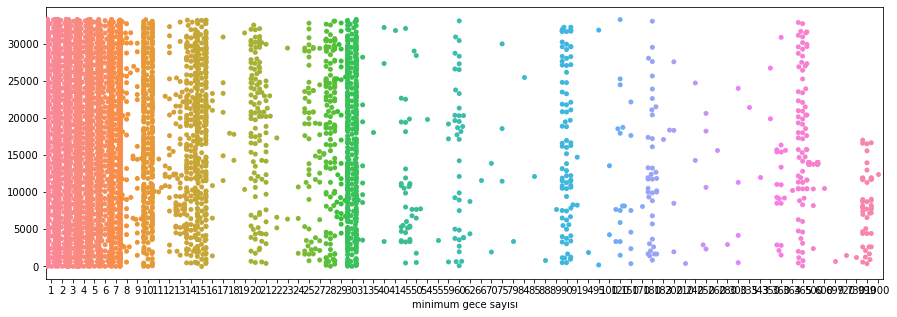

In [42]:
minnight = airbnb[airbnb.room_type=="Entire home/apt"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= minnight.index,x= minnight.values)
plt.xlabel("minimum gece sayısı")
plt.show()

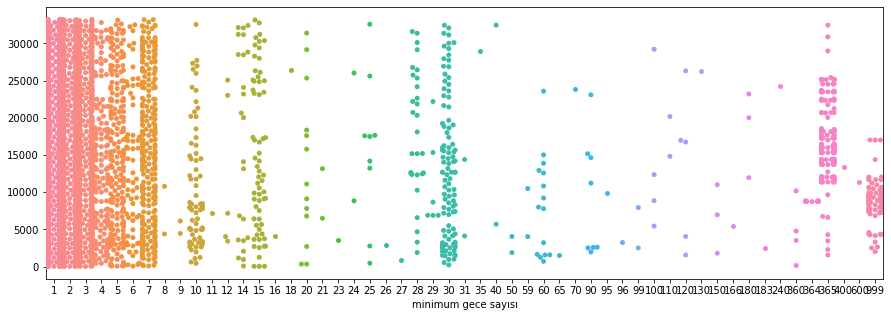

In [43]:
minnight = airbnb[airbnb.room_type=="Private room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= minnight.index,x= minnight.values)
plt.xlabel("minimum gece sayısı")
plt.show()

İnsanlar, genellikle aileleri veya arkadaşları ile seyahat ettiklerinde daha rahat olması açısından için tüm evde veya özel odalarda kalmayı tercih edebilirler. Ya da nomad denilen gezginler için de bu konaklamalar uygun olabilir. Özel evlerde 90 güne kadar, özel odalarda ise 30 güne kadar bir yoğunluk olduğu görülmektedir. Yine de en çok 1 veya 2 hafta kalanların çoğunlukta olduğu görülmektedir. Hosting için harcanan eforun azaltılması için bu tür bir konaklama oluşturulabilir

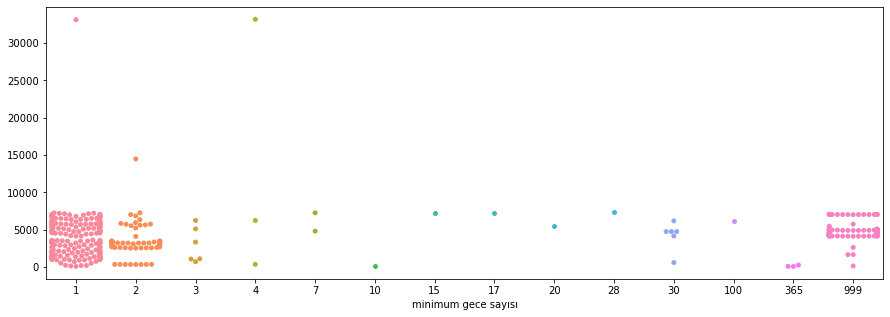

In [44]:
minnight = airbnb[airbnb.room_type=="Hotel room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= minnight.index,x= minnight.values)
plt.xlabel("minimum gece sayısı")
plt.show()


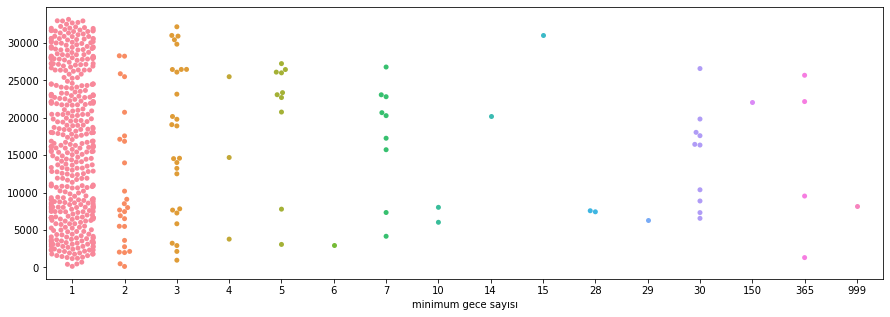

In [45]:
minnight = airbnb[airbnb.room_type=="Shared room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= minnight.index,x= minnight.values)
plt.xlabel("minimum gece sayısı")
plt.show()

Çoğunlukla gezginler, sırt çantalı gezginler ve düşük bütçeli kişiler ortak odalarda kalmayı sever. Bununla beraber diğer turistler de şehirler arası gezmektedir. Otel odası veya paylaşımlı oda formatında 1-2 gün konaklamanın en fazla olduğu görülmektedir. Bu hızlı dönüşüm nevresim yıkama, temizlik vb. masrafları artırıcı bir etkendir. 

### 3.8 Birden fazla Airbnb ilanına sahip hostlar var mı?

In [46]:
top_host=airbnb.host_id.value_counts().head(10)
top_host

45788344     205
463019242    160
21636586     141
96460850     139
223450420    138
19798022      92
21907588      72
365900986     64
238245787     61
290856747     60
Name: host_id, dtype: int64

In [47]:
#'calculated_host_listings_count' sütununu kullanarak 205 ilan sayısının doğrulanması
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

205

In [48]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host ID', 'host_id':'İlan Sayısı'}, inplace=True)
top_host_df

,Host ID,İlan Sayısı
0,45788344,205
1,463019242,160
2,21636586,141
3,96460850,139
4,223450420,138
5,19798022,92
6,21907588,72
7,365900986,64
8,238245787,61
9,290856747,60


[Text(0, 0, '19798022'),
 Text(1, 0, '21636586'),
 Text(2, 0, '21907588'),
 Text(3, 0, '45788344'),
 Text(4, 0, '96460850'),
 Text(5, 0, '223450420'),
 Text(6, 0, '238245787'),
 Text(7, 0, '290856747'),
 Text(8, 0, '365900986'),
 Text(9, 0, '463019242')]

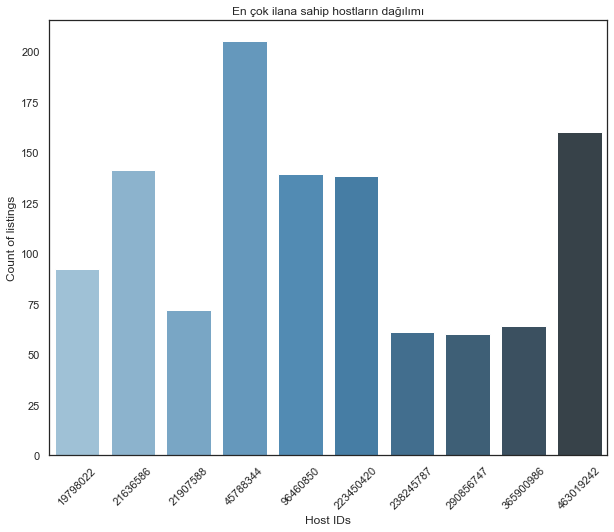

In [49]:
viz_1=sns.barplot(x="Host ID", y="İlan Sayısı", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('En çok ilana sahip hostların dağılımı')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

### 3.9 İlanlarda en çok hangi kelimeler kullanılıyor?

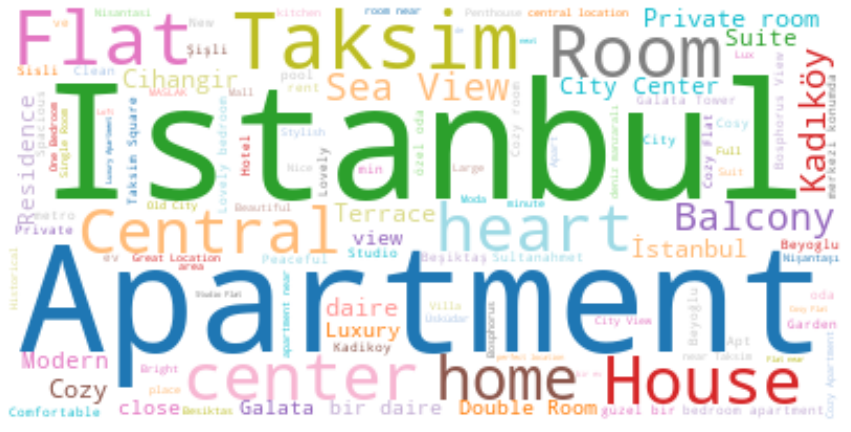

In [56]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in airbnb.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white", colormap='tab20').generate(text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [52]:
# Ekstra: Folium Kütüphanesi ile görselleştirme

In [53]:
# import pandas as pd
# import geopandas as gpd
# import math
# import folium
# from folium import Choropleth, Circle, Marker
# from folium.plugins import HeatMap, MarkerCluster
# m_1 = folium.Map(location=[40.7128,-74.0060], tiles='cartodbpositron', zoom_start=12)

# # Adding a heatmap to the base map
# HeatMap(data=dataset[['latitude', 'longitude']], radius=10).add_to(m_1)

# # Displaying the map
# m_1